In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

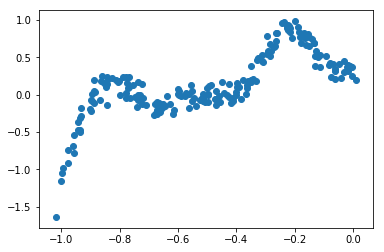

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

In [19]:
class ReluMasked(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta): # this gives the gradient for weight update in that layer
        return ((self.x >= 0).astype(float)) * output_delta

    def true_backward(self, output_delta): # this gives the true gradient to propagate backward
        return output_delta
#         return ((self.x >= 0).astype(float))
        

_______________________
epoch 0
Loss 0.09694037540748772
Weight 1 
 [[0.8222167]]
Biases 1 
 [9.72670255e-06]

_______________________
epoch 100
Loss 0.09693943393104278
Weight 1 
 [[0.82222568]]
Biases 1 
 [0.00097994]

_______________________
epoch 200
Loss 0.09693569361805303
Weight 1 
 [[0.82223324]]
Biases 1 
 [0.00283758]

_______________________
epoch 300
Loss 0.0969243873481696
Weight 1 
 [[0.8222353]]
Biases 1 
 [0.00609146]

_______________________
epoch 400
Loss 0.09690071214532951
Weight 1 
 [[0.82222542]]
Biases 1 
 [0.01088544]

_______________________
epoch 500
Loss 0.0968405721425806
Weight 1 
 [[0.82217376]]
Biases 1 
 [0.01843845]

_______________________
epoch 600
Loss 0.09669677118961388
Weight 1 
 [[0.82202206]]
Biases 1 
 [0.03034711]

_______________________
epoch 700
Loss 0.0964513506787452
Weight 1 
 [[0.82172025]]
Biases 1 
 [0.04598882]

_______________________
epoch 800
Loss 0.0959554570893285
Weight 1 
 [[0.8209867]]
Biases 1 
 [0.06802073]

_______________


_______________________
epoch 7500
Loss 0.048936242369256935
Weight 1 
 [[1.08980211]]
Biases 1 
 [0.66346195]

_______________________
epoch 7600
Loss 0.048930926027950836
Weight 1 
 [[1.0920023]]
Biases 1 
 [0.66415043]

_______________________
epoch 7700
Loss 0.048925791011287946
Weight 1 
 [[1.09416493]]
Biases 1 
 [0.66482614]

_______________________
epoch 7800
Loss 0.04892083113266836
Weight 1 
 [[1.0962905]]
Biases 1 
 [0.66548977]

_______________________
epoch 7900
Loss 0.048916040418161943
Weight 1 
 [[1.09837959]]
Biases 1 
 [0.66614174]

_______________________
epoch 8000
Loss 0.04891141309802472
Weight 1 
 [[1.10043278]]
Biases 1 
 [0.66678237]

_______________________
epoch 8100
Loss 0.04890694359941252
Weight 1 
 [[1.10245067]]
Biases 1 
 [0.66741192]

_______________________
epoch 8200
Loss 0.04890262653958117
Weight 1 
 [[1.10443386]]
Biases 1 
 [0.66803061]

_______________________
epoch 8300
Loss 0.04889845671938064
Weight 1 
 [[1.10638295]]
Biases 1 
 [0.66863864]

TclError: this isn't a Tk application

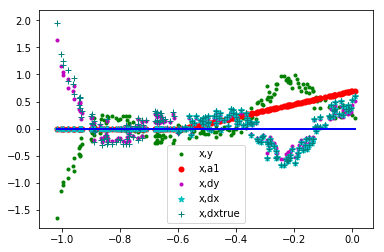

In [34]:
optimizer = tnn.SGD()
la1 = tnn.NonLinearLayer(1, 1, activation=ReluMasked(), optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = la1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = la1.backward(dy)
    

    
    
    la1.update()
    
    # this is for backpropagating error with linearbackprop
    output_delta = dy
    del_zee = la1.activation.true_backward(output_delta)
#     m = output_delta.shape[0]
#     del_bias = np.mean(del_zee, axis=0)  # * 1 / m
#     del_weights = self.input.T.dot(self.del_zee) * 1 / m
    dxtrue =  del_zee.dot(la1.weights.T)
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

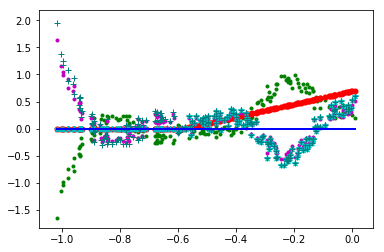

In [35]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')

plt.plot(x, np.zeros_like(x), c='b', lw=2)

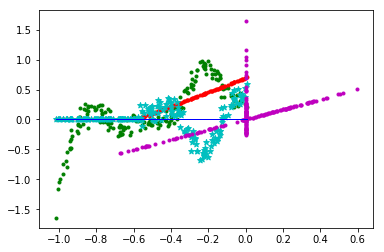

In [37]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is non linear relationship between dx and dy

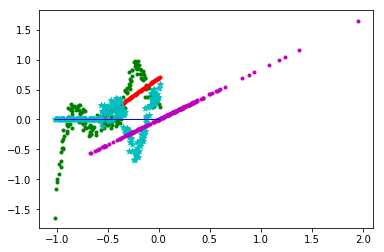

In [38]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dxtrue.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dxtrue and dy

_______________________
epoch 0
Loss 0.18278445833440338
Weight 1 
 [[ 0.28975467 -2.69607615  1.45812856  0.17155283]]
Weight 2 
 [[ 0.16060369]
 [-0.27488052]
 [ 1.71246606]
 [-0.49325982]]


_______________________
epoch 10
Loss 0.08821680255906253
Weight 1 
 [[ 0.22553183 -2.6039299   1.39827294  0.17088198]]
Weight 2 
 [[ 0.23589451]
 [-0.18086828]
 [ 1.77931666]
 [-0.49302596]]


_______________________
epoch 20
Loss 0.06243849044501031
Weight 1 
 [[ 0.13210441 -2.54729664  1.29362207  0.1707767 ]]
Weight 2 
 [[ 0.34012946]
 [-0.12058209]
 [ 1.7962877 ]
 [-0.49298927]]


_______________________
epoch 30
Loss 0.061406914174642606
Weight 1 
 [[ 0.18736635 -2.53538599  1.17149336  0.17074529]]
Weight 2 
 [[ 0.4269249 ]
 [-0.12010496]
 [ 1.68502021]
 [-0.49297832]]


_______________________
epoch 40
Loss 0.054394539681304165
Weight 1 
 [[ 0.29102455 -2.54990729  1.0411691   0.17073485]]
Weight 2 
 [[ 0.49005887]
 [-0.15589858]
 [ 1.55717212]
 [-0.49297468]]


_______________________




_______________________
epoch 420
Loss 0.035762219700235465
Weight 1 
 [[ 0.05646612 -2.73774006  0.76585824  0.17072936]]
Weight 2 
 [[ 0.65951272]
 [-0.43221873]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 430
Loss 0.03572943997988137
Weight 1 
 [[ 0.03804211 -2.74423934  0.76585824  0.17072936]]
Weight 2 
 [[ 0.65596125]
 [-0.4363675 ]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 440
Loss 0.035697105771555084
Weight 1 
 [[ 0.01939336 -2.75080078  0.76585824  0.17072936]]
Weight 2 
 [[ 0.65295856]
 [-0.44046121]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 450
Loss 0.03566512995229086
Weight 1 
 [[ 4.97958147e-04 -2.75744744e+00  7.65858238e-01  1.70729361e-01]]
Weight 2 
 [[ 0.65049918]
 [-0.44449431]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 460
Loss 0.035633413311842804
Weight 1 
 [[-0.01865158 -2.76418428  0.76585824  0.17072936]]
Weight 2 
 [[ 0.64854886]
 [-0.4484663 ]
 [ 1.20939009]
 [-0.49297277]]





_______________________
epoch 850
Loss 0.034161651447669444
Weight 1 
 [[-0.7577939  -3.15044376  0.76585824  0.17072936]]
Weight 2 
 [[ 0.99906734]
 [-0.6413245 ]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 860
Loss 0.03411909932058139
Weight 1 
 [[-0.77287265 -3.16447251  0.76585824  0.17072936]]
Weight 2 
 [[ 1.0149587 ]
 [-0.6480542 ]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 870
Loss 0.03407737987843443
Weight 1 
 [[-0.78778346 -3.17824801  0.76585824  0.17072936]]
Weight 2 
 [[ 1.03087168]
 [-0.65472623]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 880
Loss 0.03403678038734318
Weight 1 
 [[-0.80234442 -3.19193207  0.76585824  0.17072936]]
Weight 2 
 [[ 1.04647999]
 [-0.66135478]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 890
Loss 0.033997396662909914
Weight 1 
 [[-0.81648829 -3.20571516  0.76585824  0.17072936]]
Weight 2 
 [[ 1.06195865]
 [-0.66795898]
 [ 1.20939009]
 [-0.49297277]]


________________



_______________________
epoch 1280
Loss 0.03311535912828805
Weight 1 
 [[-1.21941297 -3.69585089  0.76585824  0.17072936]]
Weight 2 
 [[ 1.56487734]
 [-0.87233434]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1290
Loss 0.03310661537825266
Weight 1 
 [[-1.22572425 -3.70492034  0.76585824  0.17072936]]
Weight 2 
 [[ 1.57312313]
 [-0.87608319]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1300
Loss 0.033098667057016265
Weight 1 
 [[-1.23183796 -3.71368935  0.76585824  0.17072936]]
Weight 2 
 [[ 1.58113445]
 [-0.87965953]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1310
Loss 0.03309135237449509
Weight 1 
 [[-1.2378166  -3.72214202  0.76585824  0.17072936]]
Weight 2 
 [[ 1.58898979]
 [-0.88307092]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1320
Loss 0.033084507496785376
Weight 1 
 [[-1.24364757 -3.73048914  0.76585824  0.17072936]]
Weight 2 
 [[ 1.59666892]
 [-0.8863415 ]
 [ 1.20939009]
 [-0.49297277]]


___________



_______________________
epoch 1710
Loss 0.032982798213505964
Weight 1 
 [[-1.38042825 -3.9313339   0.76585824  0.17072936]]
Weight 2 
 [[ 1.7778638 ]
 [-0.96276286]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1720
Loss 0.03298231834113128
Weight 1 
 [[-1.38216148 -3.93394723  0.76585824  0.17072936]]
Weight 2 
 [[ 1.78016792]
 [-0.96372918]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1730
Loss 0.03298186585267526
Weight 1 
 [[-1.38385169 -3.93649542  0.76585824  0.17072936]]
Weight 2 
 [[ 1.78241509]
 [-0.96466912]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1740
Loss 0.03298143942722967
Weight 1 
 [[-1.38549822 -3.93897827  0.76585824  0.17072936]]
Weight 2 
 [[ 1.7846043 ]
 [-0.96558391]
 [ 1.20939009]
 [-0.49297277]]


_______________________
epoch 1750
Loss 0.032981037809891166
Weight 1 
 [[-1.3871003  -3.94139573  0.76585824  0.17072936]]
Weight 2 
 [[ 1.78673438]
 [-0.9664747 ]
 [ 1.20939009]
 [-0.49297277]]


___________

TclError: this isn't a Tk application

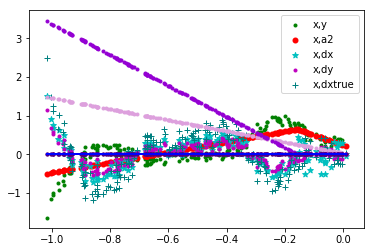

In [39]:
hidden_size = 4

optimizer = tnn.Adam()
la1a = tnn.NonLinearLayer(1, hidden_size, activation=ReluMasked(), optimizer=optimizer)
la2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = la1a.forward(x_data)
    a2 = la2a.forward(a1)
    loss = tnn.MseLoss.loss(a2, y_data)
    dy = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = la2a.backward(dy)
    dx = la1a.backward(da1)
    
    # this is for backpropagating error with linearbackprop
    output_delta = da1
    del_zee = la1a.activation.true_backward(output_delta)
    dxtrue =  del_zee.dot(la1a.weights.T)
    
    la1a.update()
    la2a.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
            
        print("Weight 1", '\n', la1a.weights)
        print("Weight 2", '\n', la2a.weights)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

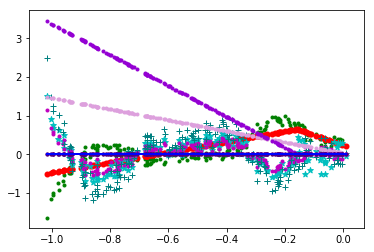

In [40]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(a1.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)